In [ ]:
from google.colab import files
files.upload()

Saving pass2.csv to pass2 (4).csv


{'pass2.csv': b'Hours Studied,Previous Test Score,Exam Result\n3,75,1\n5,80,1\n2,60,0\n6,90,1\n4,70,1\n1,50,0\n7,85,1\n4,65,0\n7,60,1\n2,55,0\n6,80,1\n8,95,1\n'}

In [ ]:
!ls

In [ ]:
import pandas as pd
import numpy as np
import sklearn as skt
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
data=pd.read_csv("/content/pass2.csv")
data=data.reset_index(drop=True)

In [ ]:
data

,Hours Studied,Previous Test Score,Exam Result
0,3,75,1
1,5,80,1
2,2,60,0
3,6,90,1
4,4,70,1
5,1,50,0
6,7,85,1
7,4,65,0
8,7,60,1
9,2,55,0


In [ ]:
data.shape

(12, 3)

In [ ]:
pass_df = data[data['Exam Result'] == 1]

# Do the same as above
fail_df = None

plt.plot(pass_df['Hours Studied'], pass_df['Previous Test Score'], 'x', label='Pass')

# Plot fail_df just like pass_df

plt.xlabel('Hours Studied')
plt.ylabel('Previous Test Score')
plt.show()

In [ ]:
x=data[['Hours Studied','Previous Test Score']].to_numpy()

In [ ]:
x

array([[ 3, 75],
       [ 5, 80],
       [ 2, 60],
       [ 6, 90],
       [ 4, 70],
       [ 1, 50],
       [ 7, 85],
       [ 4, 65],
       [ 7, 60],
       [ 2, 55],
       [ 6, 80],
       [ 8, 95]])

In [ ]:
y=data['Exam Result'].to_numpy()

In [ ]:
"""
Do train_test_split
syntax train_test_split(x, y, test_size)
choose test size = 0.25
"""

X_train, X_test, y_train, y_test = None

# Model Creation


Create a object of class `LogisticRegression` and call it `model`

Call a method `fit` of the object with arguments `X_train` and `y_train`

In [ ]:
model = None
# model.fit()

These are the weights of each feature

In [ ]:
print(model.coef_, model.intercept_)

[[0.85624379 0.29064133]]


In [ ]:
coef = model.coef_[0]
intercept = model.intercept_
print(coef, intercept)

[0.85624379 0.29064133] [-22.61763916]


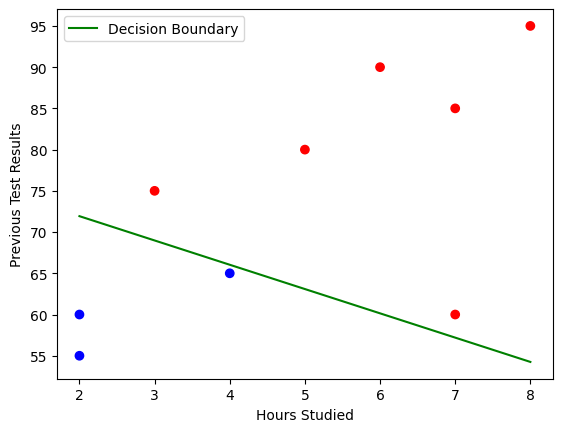

In [ ]:
# Define the decision boundary equation
# Assuming X[:, 0] represents hours studied and X[:, 1] represents previous test results
# The decision boundary equation will be coef[0]*X[:, 0] + coef[1]*X[:, 1] + intercept = 0
x = np.linspace(np.min(X_train[:, 0]), np.max(X_train[:, 0]), 100)
y = -(coef[0]*x + intercept) / coef[1]

# Plot the data points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')
plt.xlabel('Hours Studied')
plt.ylabel('Previous Test Results')

# Plot the decision boundary
plt.plot(x, y, '-g', label='Decision Boundary')
plt.legend()

# Show the plot
plt.show()

In [ ]:
pred = model.predict(X_test)
print(accuracy_score(y_test,pred))


1.0


In [ ]:
hours_studied=5
previous_test_score=50

In [ ]:
print(model.predict([[hours_studied,previous_test_score]]))

[0]


In [ ]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

y = np.linspace(45, 100, 100)
x = np.linspace(0, 8, 100)
X, Y = np.meshgrid(x, y)

# Generate height values (replace with your own data)
Z = model.predict_proba(np.c_[X.ravel(), Y.ravel()])[:,1]
Z = Z.reshape(X.shape)
# Z = np.sin(np.sqrt(X**2 + Y**2))

# Create the contour plot
plt.contourf(X, Y, Z, cmap='plasma')

# Add a colorbar for reference
plt.colorbar(label='Probablity', ticks=[0, 0.25, 0.5, 0.75, 1])
plt.plot(pass_df['Hours Studied'], pass_df['Previous Test Score'], 'x', label='Pass')
plt.plot(fail_df['Hours Studied'], fail_df['Previous Test Score'], 'o', label='Fail')


abline(-2.56, 76)
# Set labels and title
plt.ylabel('Previous Test Score')
plt.xlabel('Hours Studied')
plt.title('Contour Plot')

# Display the plot
plt.show()